In [5]:
import numpy as np
from scipy.spatial.distance import pdist,squareform
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from glob import glob
import os
import skimage.io as io

In [6]:
INPUT="../data"
#Data=pd.read_csv("../data/supplementaryMovie5_ancestor_ALI_regions_props_start_f=62end_f=89.csv")
Data=pd.read_csv("../data/supplementaryMovie5_ancestor_ALI_Traj_data_cleaned_3px_min_area.csv")

In [7]:
# find img dimensions
FileName=glob(os.path.join(INPUT,"*segmented.tiff"))
img=io.imread(FileName[0])
Nframes=img.shape[0]
Nrows=img.shape[1]
Ncols=img.shape[2]

print("Nframes={:}, Nrows={:}, Ncols={:}".format(Nframes,Nrows,Ncols))

Nframes=27, Nrows=800, Ncols=1500


## Filter objects with area range 

Text(0.5,0.98,'distribution across all Dataset')

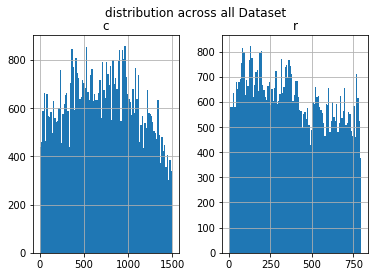

In [4]:
Data=Data[(Data.area<100) & (Data.area>9)]
Data_selected=Data[['frame','r','c']]
Data_selected[['r','c']].hist(bins=100)
plt.suptitle('distribution across all Dataset')

## Pair distance distribution

In [8]:
def pair_distance_distribution(PointsCloud,MaximumDistance,dr):
    
    Area=2*np.pi*MaximumDistance**2
    # forming bins
    bins=np.arange(0,MaximumDistance,dr)

    # norm to the area of the layer 2*pi*dr*R
    norm_factor=bins*2*np.pi*dr
    
    DistValues=pdist(PointsCloud, metric='euclidean')
    DistValues=DistValues[DistValues<MaximumDistance]
    Ro=DistValues.shape[0]/Area # avarage density
    
    n,bins=np.histogram(DistValues,bins=bins)
    n_new=n/(Ro*norm_factor[1:])
    
    return n_new,bins
    

In [9]:

List_result=[]
MaximumDistance=600
dr=3

for frame in range(int(Data.frame.max())):
    #print(frame)
    SelectOneFrame=Data_selected[Data_selected.frame==frame]
    PointsCloud=SelectOneFrame[['r','c']].values
    n_new, bins=pair_distance_distribution(PointsCloud,MaximumDistance,dr)
    List_result.append(n_new)


### Artificial data generation

In [10]:
ObjectsPerFrame=Data.groupby("frame").size()
ObjectsPerFrame
np.random.seed(0)
List_random_generated=[]

for nobject in ObjectsPerFrame:
    RandRows=np.random.randint(Nrows, size=nobject)
    RandCols=np.random.randint(Ncols, size=nobject)
    Output=np.column_stack((RandRows,RandCols))
    n_new, bins=pair_distance_distribution(Output,MaximumDistance,dr)
    List_random_generated.append(n_new)

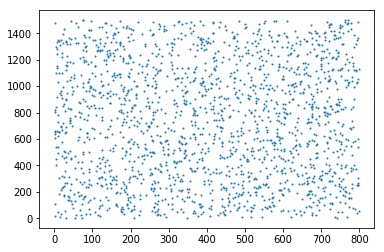

In [11]:
plt.scatter(RandRows,RandCols,s=1)

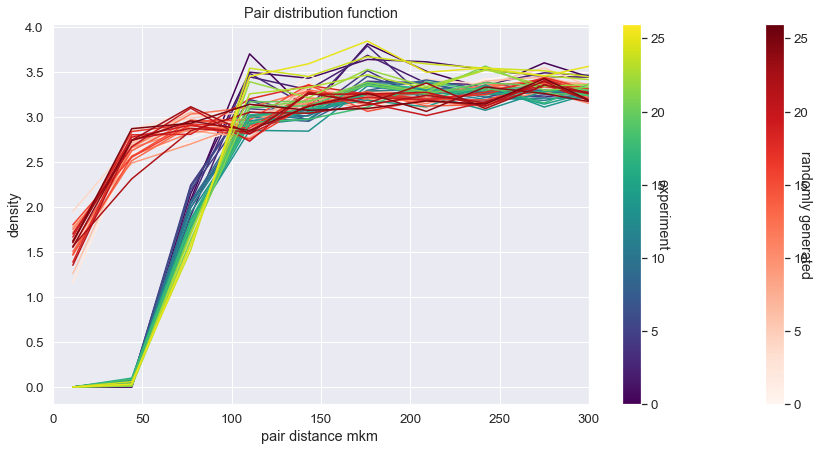

In [12]:
sns.set(font_scale=1.2)
bins_center=bins+dr/2

fig, ax = plt.subplots(1,1,figsize=(15,7))
Nframes=int(max(Data.frame))

cmap_fig=plt.get_cmap('viridis')
cmap_fig_rand=plt.get_cmap('Reds')
norm = matplotlib.colors.Normalize(vmin=0, vmax=Nframes)
s_m = matplotlib.cm.ScalarMappable(cmap=cmap_fig, norm=norm)
s_m_rand = matplotlib.cm.ScalarMappable(cmap=cmap_fig_rand, norm=norm)
s_m.set_array([])
s_m_rand.set_array([])

## set the labels for each plot from the subplot
ax.set_title("Pair distribution function")
ax.set_xlabel("pair distance mkm ")
ax.set_ylabel("density")
cb_rand=plt.colorbar(s_m_rand,ax=ax)
cb_rand.set_label("randomly generated",rotation=270)
cb=plt.colorbar(s_m,ax=ax)
cb.set_label("experiment",rotation=270)
ax.set_xlim((0,300))

#####################################################################################
counter=0
for frame in range(0,Nframes,1):
    ax.plot(bins_center[:-1]*11,List_result[frame], color = cmap_fig(norm(frame)),label=str(frame))
    ax.plot(bins_center[:-1]*11,List_random_generated[frame], color = cmap_fig_rand(norm(frame)),label=str(frame))
    counter=counter+1
    
fig.savefig("../results/for presentation/Pair_distribution_function.png")